### Does it makes sense to develop an inverse bilateral filter, which blurs an image at edges and preserves the homogeneous regions. If it makes sense, design it and suggest its applications 

In [2]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

In [3]:
i1 = './A2_resources/pots_flash.jpg'

img1 = cv2.imread(i1)

In [4]:
def gauss2D(shape,sigma):
    m,n = [(ss-1)/2 for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    
    return h

In [5]:
def bfunc(i,j,fw,fh,image,sigma_b, sigma_g, domainFilter):
    imgwork = image[i - fh//2:i+1 + fh//2, j - fw//2:j+1 + fw//2, :]
    
    rangeFilter = 255 - 255*(((imgwork - image[i, j,:])**2 )/(2*(sigma_b**2)))
    
    bilateralFilter = np.exp(-1*rangeFilter)*domainFilter
    bilateralFilter = bilateralFilter/np.sum(bilateralFilter,axis=(0,1))
    
    return np.sum(np.multiply(imgwork, bilateralFilter),axis=(0,1))

In [6]:
def bilateralFilterConv(image, fw,fh, sigma_b, sigma_g):
    size = image.shape
    
    domain = gauss2D((fw,fh), sigma_g)
    
    id = 0
    if image.shape[2] == 1:
        id = 1
        domainFilter = np.resize(domain,(*domain.shape,1))
    else:
        domainFilter = np.stack([domain, domain, domain], axis=2)
    
    out = np.zeros((size[0]-2*fw +1,size[1]-2*fh +1,size[2]))
    for i in range(size[0]-2*fh +1):
        for j in range(size[1]-2*fw +1):
            out[i,j,:] = bfunc(i+fw-1, j+fh-1, fw, fh, image, sigma_b, sigma_g, domainFilter)
    
    if id == 1:
        return np.resize(out, (out.shape[0], out.shape[1])).astype(np.uint8)
    else:
        return out.astype(np.uint8)

In [7]:
img3 = bilateralFilterConv(img1, 5, 5, 40, 40)

b1, g1, r1 = cv2.split(img1)
img1 = cv2.merge((r1,g1,b1))

b3, g3, r3 = cv2.split(img3)
img3 = cv2.merge((r3,g3,b3))

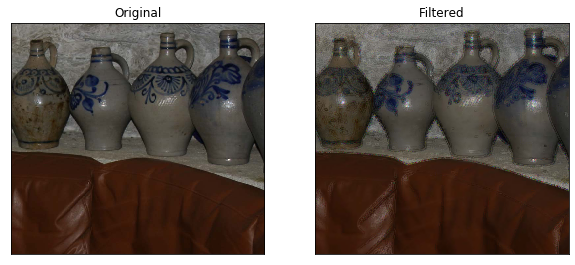

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img1)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img3)
plt.title('Filtered'), plt.xticks([]), plt.yticks([])
plt.show()